# 1. 데이터 로드 및 표준화

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()

In [2]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(iris.data)

# 2. LDA를 이용한 차원 축소

In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(iris_scaled, iris.target)
lda.explained_variance_ratio_

array([0.9912126, 0.0087874])

> 실행 결과 2개의 결과를 갖게 된다. 이는 n_components가 None인 경우 <= min(n_classes - 1, n_features)을 갖게 되며 n_classes는 3(iris 종류)이고 n_features는 4이므로 3-1인 2가 n_components의 기본값으로 설정되었기 때문에 그렇다.

In [4]:
iris_lda = lda.transform(iris_scaled)

In [5]:
import pandas as pd 

lda_columns = ['lda_columns_1', 'lda_columns_2']
df_lda = pd.DataFrame(iris_lda, columns=lda_columns)
df_lda['target'] = iris.target

# 3. 시각화

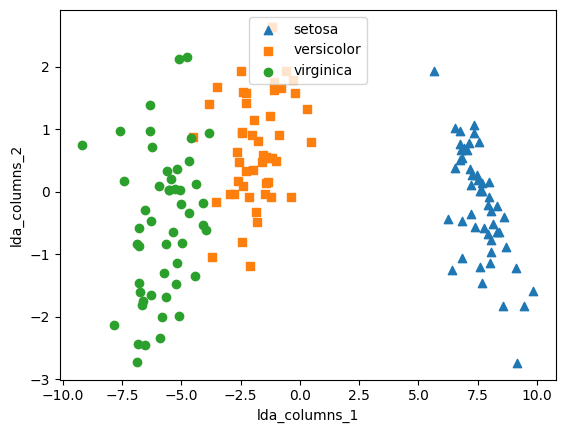

In [25]:
import matplotlib.pyplot as plt

markers = ['^', 's', 'o']

for i,marker in enumerate(markers):
    x_data = df_lda[df_lda['target']==i]['lda_columns_1']
    y_data = df_lda[df_lda['target']==i]['lda_columns_2']

    plt.scatter(x_data, y_data, marker=marker, label=iris.target_names[i])

# loc=1 : 우측 상단
# loc=2 : 좌측 상단
# loc=3 : 좌측 하단
# loc=4 : 우측 하단
# upper : 상단
# lower : 하단
# left, right, center : 왼쪽 오른쪽 가운데
plt.legend(loc='upper center')
plt.xlabel('lda_columns_1')
plt.ylabel('lda_columns_2')
plt.show()